**Example C:**  
We are going to use 2 layers  
optimizer we are going to use SGD  
We are going to use with Normalization  

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

In [2]:
data = pd.read_csv('/content/insurance_data.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [3]:
ct=make_column_transformer(
(MinMaxScaler(), ["age", "bmi", "children"]), #It rescales features so that all of them fall within a fixed range, usually [0, 1].
(OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region']))

In [4]:
x = data.drop('charges', axis=1)
y = data['charges']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
## Fit the transformer on training data
x_train_normal = ct.fit_transform(x_train)
x_test_normal = ct.transform(x_test)

In [7]:
#non normalize
print(x_train)
print(x_train.shape)

   age     sex     bmi  children smoker     region
5   31  female  25.740         0     no  southeast
2   28    male  33.000         3     no  southeast
4   32    male  28.880         0     no  northwest
3   33    male  22.705         0     no  northwest
(4, 6)


In [8]:
#normalize
print(x_train_normal)
print(x_train_normal.shape)

[[0.6        0.2948033  0.         1.         0.         1.
  0.         1.        ]
 [0.         1.         1.         0.         1.         1.
  0.         1.        ]
 [0.8        0.59980573 0.         0.         1.         1.
  1.         0.        ]
 [1.         0.         0.         0.         1.         1.
  1.         0.        ]]
(4, 8)


In [9]:
# Then fit your model on the transformed data
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

In [10]:
model.compile(optimizer = 'adam', loss = 'mae', metrics=['mae'])

In [11]:
history = model.fit(x_train_normal,y_train, epochs=200, verbose=0)

In [12]:
model.evaluate(x_test_normal,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 9160.6748 - mae: 9160.6748


[9160.6748046875, 9160.6748046875]

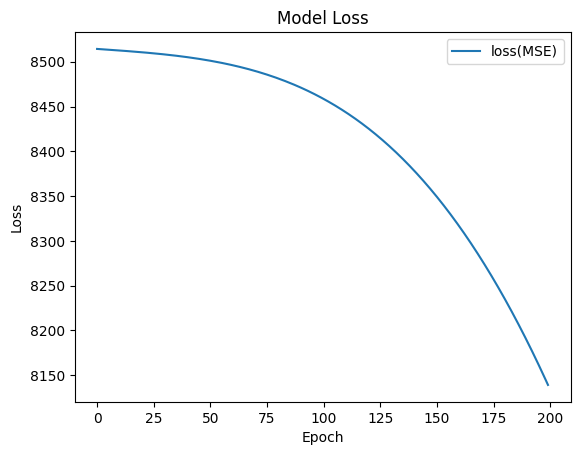

In [13]:
plt.plot(history.history['loss'], label= 'loss(MSE)')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()